In [1]:
## Import Libraries

In [2]:
#Import basic modules.
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

# Plotly visualization.
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

# Machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Classification (evaluation) metrices.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
%matplotlib inline

## Import Cleaned Dataset

In [5]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned_data.csv')
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [6]:
df_Reg = df.copy()
df_class = df.copy()

In [7]:
#Droping features ['day' and 'month'] beacuse it is not important for analysis 
df_Reg.drop('month',axis=1, inplace=True)

In [8]:
df_Reg.drop('day',axis=1, inplace=True)

In [9]:
df_Reg

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
df_Reg.drop('Classes',axis=1, inplace=True)

In [11]:
df_Reg.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region'],
      dtype='object')

## Splitting dataset into train and test

In [12]:
X = df_Reg.drop('FWI',axis=1)
y= df_Reg['FWI']

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [14]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
230,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,1
218,34,71,14,6.5,64.5,3.3,9.1,1.0,3.5,1
184,39,33,17,0.0,93.7,17.1,32.1,17.2,16.9,1
233,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,1
204,36,43,16,0.0,91.2,46.1,137.7,11.5,50.2,1
...,...,...,...,...,...,...,...,...,...,...
67,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,0
47,31,68,14,0.0,85.4,12.1,43.1,4.6,14.2,0


In [15]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,0
150,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,1
37,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,0
75,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,0
109,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,0
...,...,...,...,...,...,...,...,...,...,...
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1
160,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,1
159,35,47,18,6.0,80.8,9.8,9.7,3.1,9.4,1
170,36,50,16,0.0,89.9,32.7,71.0,9.5,32.6,1


## Transformation for continuous variables
* For left skewed FFMC log transformation is not look like good.
* While for positive skewed log transformation is performing well.

In [75]:
X_train['DC'] = np.log(X_train['DC'])
X_train['BUI'] = np.log(X_train['BUI'])
X_train['DMC'] = np.log(X_train['DMC'])

In [76]:
X_test['DC'] = np.log(X_test['DC'])
X_test['BUI'] = np.log(X_test['BUI'])
X_test['DMC'] = np.log(X_test['DMC'])

In [77]:
from scipy.stats import skew

Temperature
-0.12700258883392018


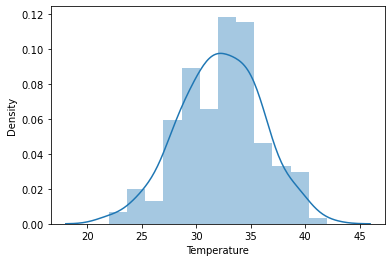

RH
-0.22093481934219378


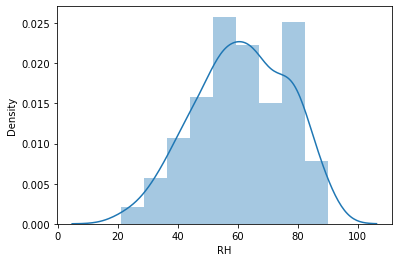

Ws
0.756507919791768


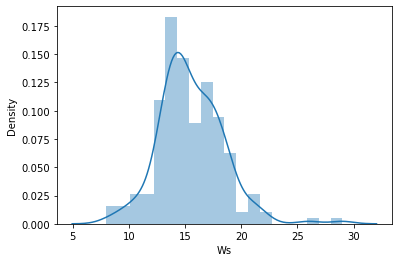

Rain
4.403786384353108


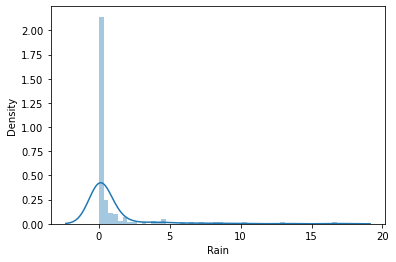

FFMC
-1.3238183946208255


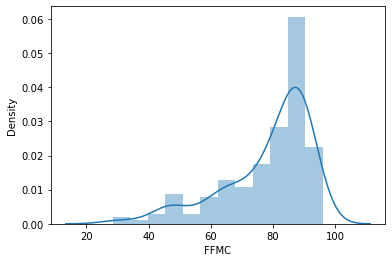

DMC
-0.42948668726315375


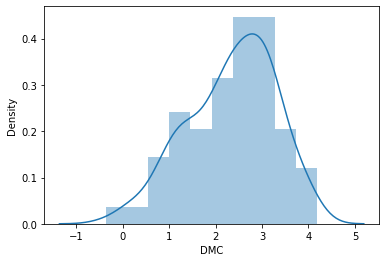

DC
-0.014266769142660818


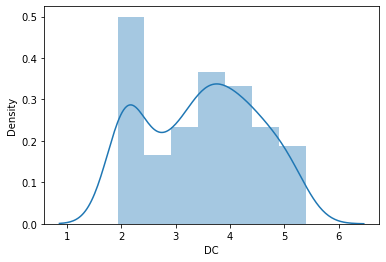

ISI
1.0600982824871346


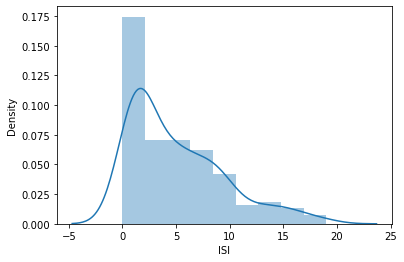

BUI
-0.27714480765410754


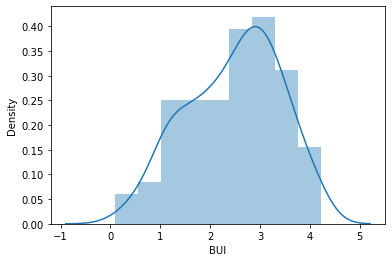

Region
0.04396666392333007


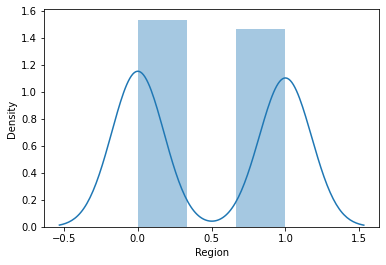

In [78]:
for col in X_train:
    print(col)
    print(skew(X_train[col]))
    
    plt.figure()
    sns.distplot(X_train[col])
    plt.show()

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
Skewness before and after log transformation 
BUI before 1.4  After -0.2
DMC before 1.5  After -0.4
DC before 1.46  After -0.014
So we suceesfully transform these three variables by reducing skewness.

Since feature ISI,Rain,FWI have very less variance(apread) and 0's values so we will not aply any transformation on these features, because this will again increase skewness and also this can introduce some negative infinite values for 0's.
So for such features we can cap outlires to reduce some skewness.

## Feature selection

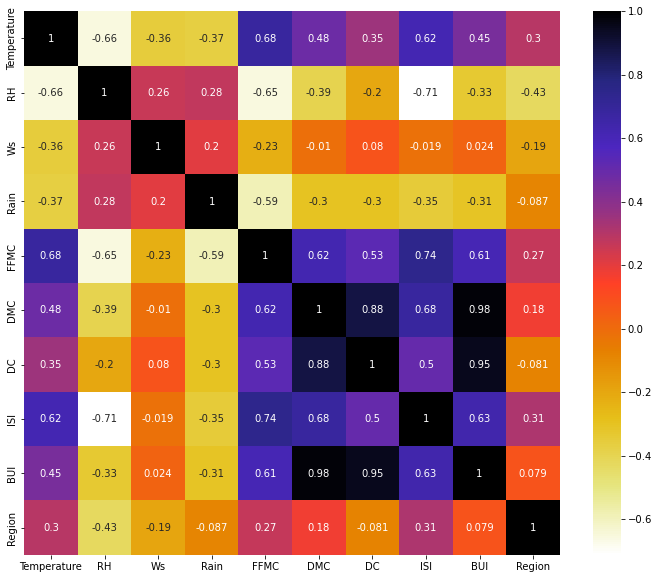

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

* Here we ca see that after log normal transformationthe correlation between BUI,DMC and DC is increased.
* Out of these three DC has less corr with dependent feature so we can drop DC


In [17]:
X_train.drop('DC',axis=1, inplace=True)

In [18]:
X_train.drop('BUI',axis=1, inplace=True)

In [20]:
X_test.drop('DC',axis=1, inplace=True)

In [21]:
X_test.drop('BUI',axis=1, inplace=True)

## Feature scaling using Standard Scalar

In [22]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [25]:
#### Box plot the dataset to understand effect of standard scaler

Text(0.5, 1.0, 'X_train After Scaling')

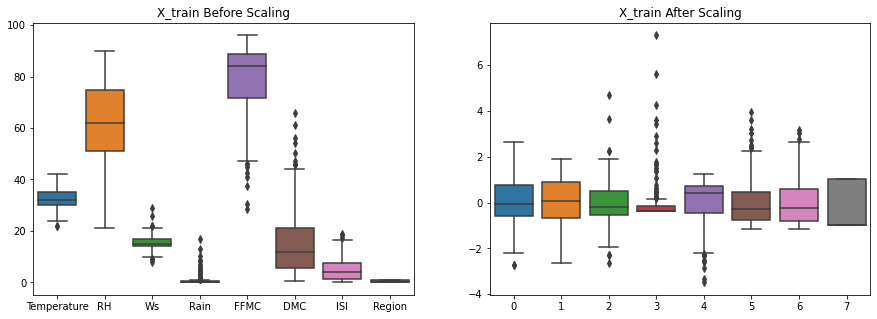

In [26]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Selection For Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.9700
MAE value: 0.6453


In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.9377
MAE value: 1.1209


In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9690
MAE value: 0.6648


In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.9340
MAE value: 0.8676


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9792
MAE value: 0.5873


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.9422
MAE value: 0.9816


In [33]:
### We can see Random forest giving best accuracy and less error campare to other models

In [34]:
from sklearn.model_selection import RandomizedSearchCV

## Hyperparameter Tuning

In [35]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [36]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9775
MAE value: 0.5913


In [37]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings 
warnings.filterwarnings(action= 'ignore')
ridge_params = [{'alpha': (np.logspace(-11, 11, 100)), 
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}] 

ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs= -1)
random_ridge.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'l

In [38]:
best_ridge = random_ridge.best_estimator_

rbest_pred = best_ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9700
MAE value: 0.6453


## Data Reduction

In [39]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
230,36,33,13,0.1,90.6,25.8,9.0,1
218,34,71,14,6.5,64.5,3.3,1.0,1
184,39,33,17,0.0,93.7,17.1,17.2,1
233,35,34,17,0.0,92.2,23.6,13.8,1
204,36,43,16,0.0,91.2,46.1,11.5,1
...,...,...,...,...,...,...,...,...
67,32,69,16,0.0,86.5,15.5,5.5,0
192,40,31,15,0.0,94.2,22.5,16.6,1
117,31,54,11,0.0,82.0,6.0,2.5,0
47,31,68,14,0.0,85.4,12.1,4.6,0


In [ ]:
### Here I want to take 5 important paraeter for api

In [40]:
Xtrain_new = X_train.drop(['RH','Rain','Region'], axis=1)
Xtest_new = X_test.drop(['RH','Rain','Region'], axis=1)

In [41]:
Xtrain_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [42]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

## Regression model deployment

In [43]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9828
MAE value: 0.5691


In [44]:
import bz2,pickle
file = bz2.BZ2File('myregression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()